<a href="https://colab.research.google.com/github/Bigyajeet/Cat-Vs-Dog-Image-Classification-Project/blob/main/catvdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install kagglehub



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)





Path to dataset files: /kaggle/input/dogs-vs-cats


In [3]:
import os

dataset_path = '/kaggle/input/dogs-vs-cats'

# List all files and directories inside the dataset path
print("Contents of the dataset directory:")
for item in os.listdir(dataset_path):
    print(os.path.join(dataset_path, item))

Contents of the dataset directory:
/kaggle/input/dogs-vs-cats/dogs_vs_cats
/kaggle/input/dogs-vs-cats/test
/kaggle/input/dogs-vs-cats/train


In [4]:
import os

nested_dataset_path = '/kaggle/input/dogs-vs-cats/dogs_vs_cats'

print(f"Contents of the nested directory: {nested_dataset_path}")
try:
    for item in os.listdir(nested_dataset_path):
        print(os.path.join(nested_dataset_path, item))
except FileNotFoundError:
    print(f"Directory not found: {nested_dataset_path}. Please double-check the path.")
except NotADirectoryError:
    print(f"'{nested_dataset_path}' is not a directory. Something is unexpected.")

Contents of the nested directory: /kaggle/input/dogs-vs-cats/dogs_vs_cats
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test
/kaggle/input/dogs-vs-cats/dogs_vs_cats/train


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [6]:
#generator
t_ds=keras.utils.image_dataset_from_directory(
    directory = nested_dataset_path,
    labels = "inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

v_ds=keras.utils.image_dataset_from_directory(
    directory = nested_dataset_path,
    labels = "inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 25000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


In [7]:
#NORMALIZE
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label


t_ds=t_ds.map(process)
v_ds=v_ds.map(process)


In [8]:
# cnn model
model=Sequential()


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',input_shape=(256,256,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,714,241 (14.17 MB)

 Trainable params: 3,714,241 (14.17 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(t_ds,epochs=11,validation_data=v_ds)

Epoch 1/11
782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 166ms/step - accuracy: 0.7997 - loss: 0.5158 - val_accuracy: 0.8000 - val_loss: 0.5019
Epoch 2/11
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 108ms/step - accuracy: 0.8021 - loss: 0.5004 - val_accuracy: 0.8000 - val_loss: 0.5004
Epoch 3/11
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 109ms/step - accuracy: 0.8016 - loss: 0.4994 - val_accuracy: 0.8000 - val_loss: 0.4995
Epoch 4/11
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.8014 - loss: 0.4980 - val_accuracy: 0.7994 - val_loss: 0.4968
Epoch 5/11
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 106ms/step - accuracy: 0.8022 - loss: 0.4922 - val_accuracy: 0.7996 - val_loss: 0.4945
Epoch 6/11
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 108ms/step - accuracy: 0.8042 - loss: 0.4792 - val_accuracy: 0.8049 - val_loss: 0.4834
Epoch 7/11
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 108ms/step - accuracy: 0.8175 - loss: 0.4467 - val_accuracy: 0.8114 - val_loss: 0.4733
Epoch 8/11
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 107ms/step - accuracy: 0.8469 - l

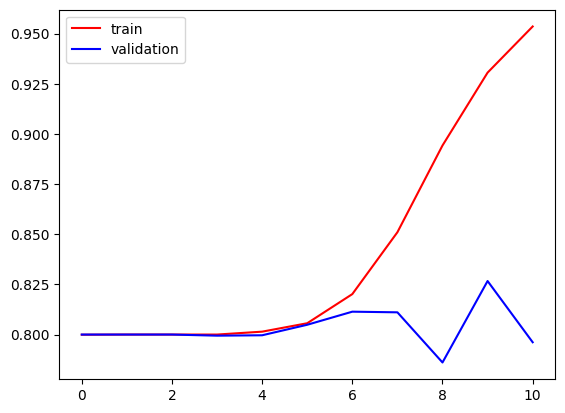

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

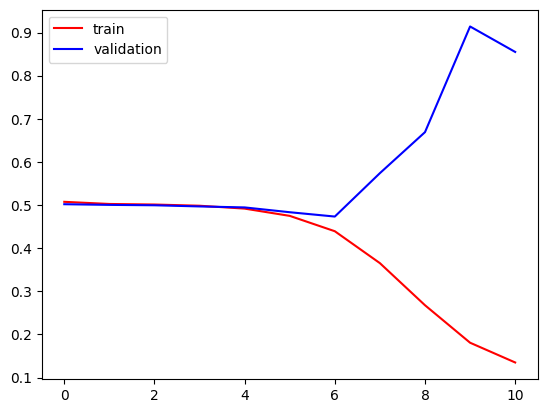

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()